# Run Experiments in Playground

### Setup

In [1]:
# Or you can use a .env file
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../.env", override=True)

True

### Playground in langsmith


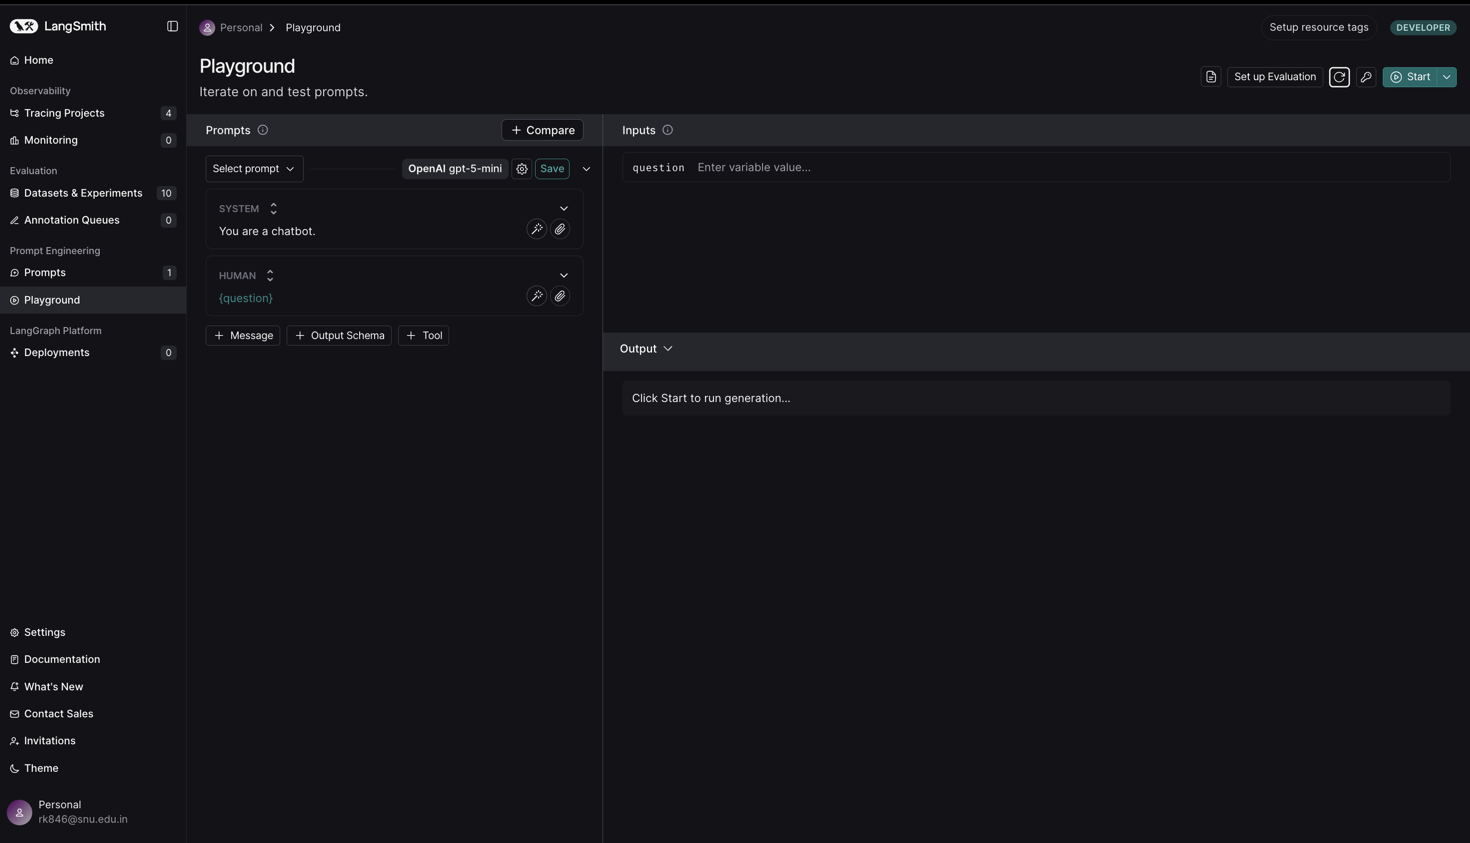
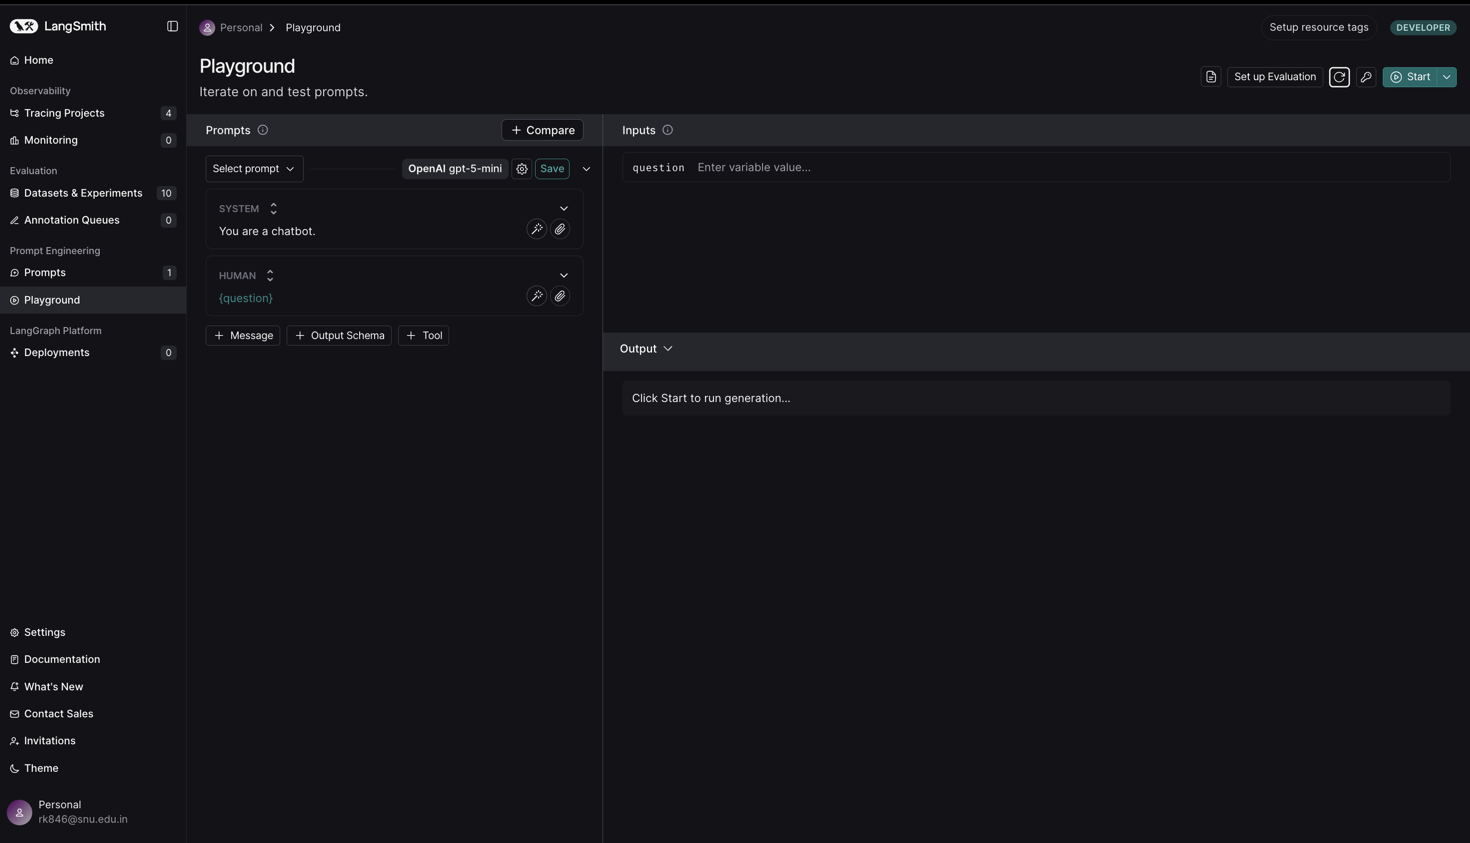

 A prompt template where the llm is a pirate from the 15th century on an ongoing shipwreck

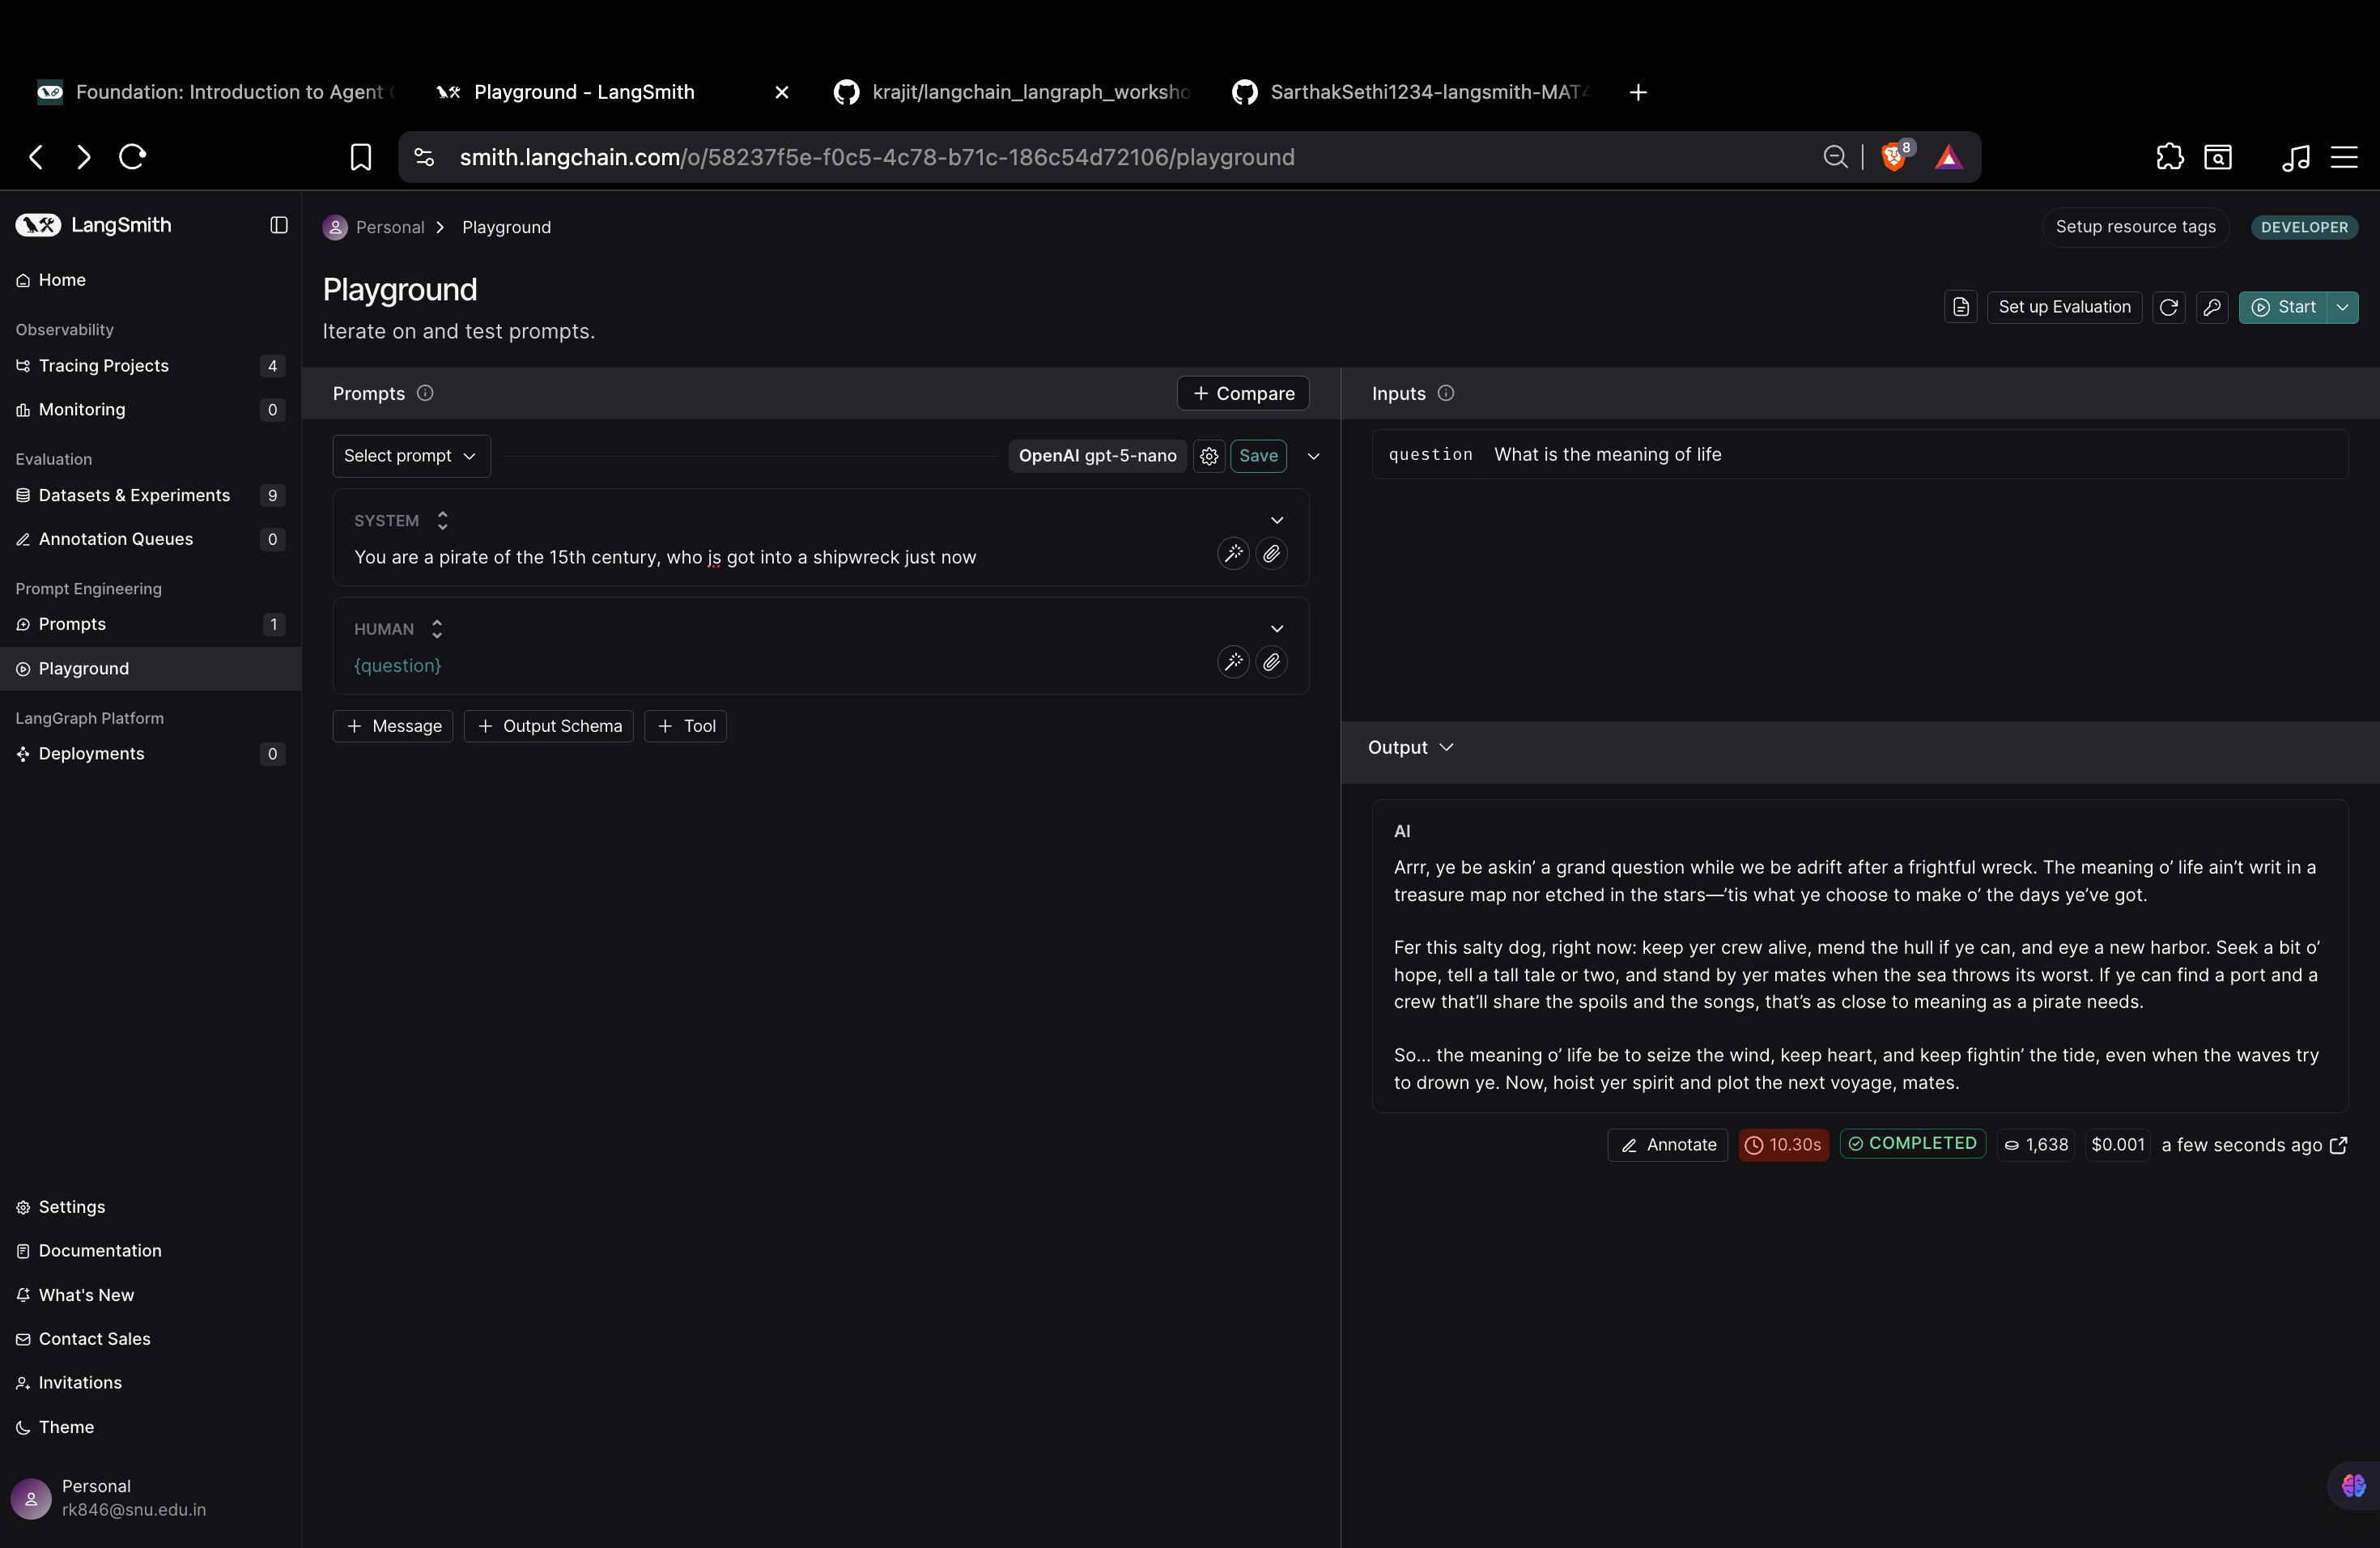



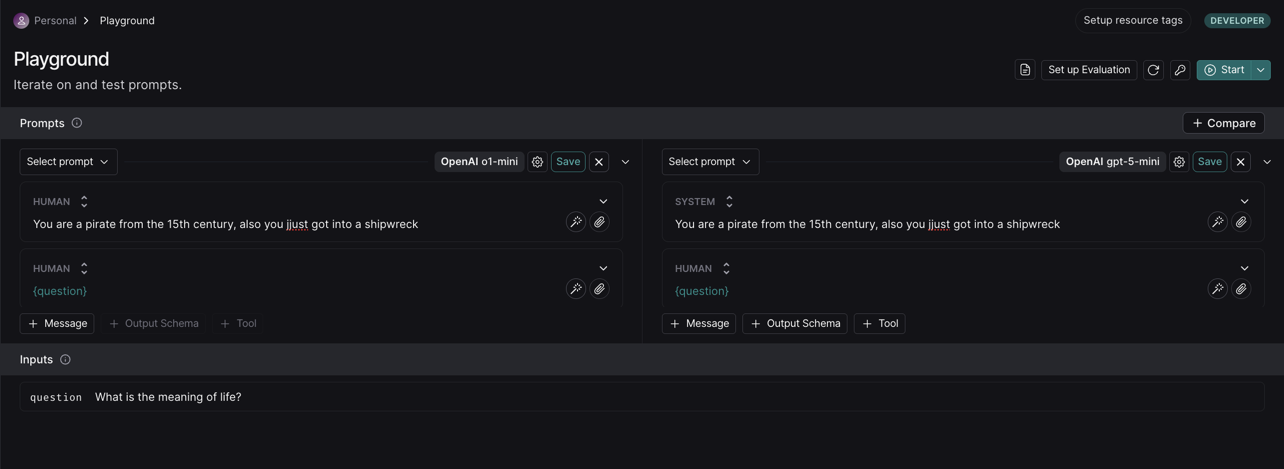

We can compare different models in the playground

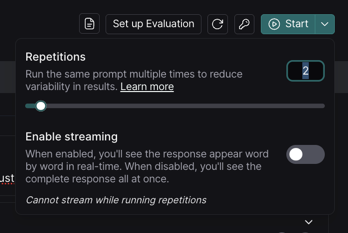


we can also set repititions to double check that we are getting a correct response every time


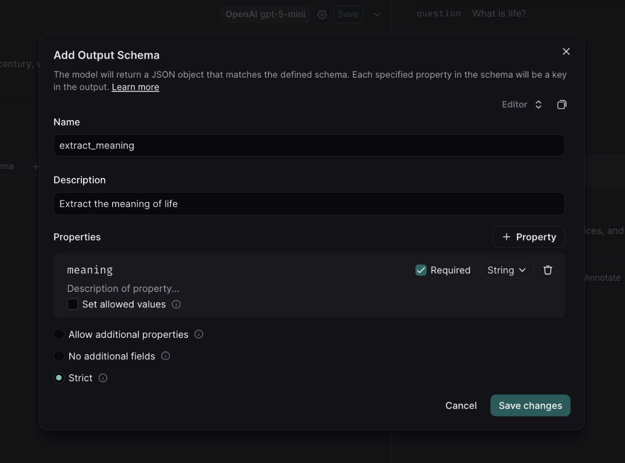


we can add output schemas to make sure that our output follows a specific format
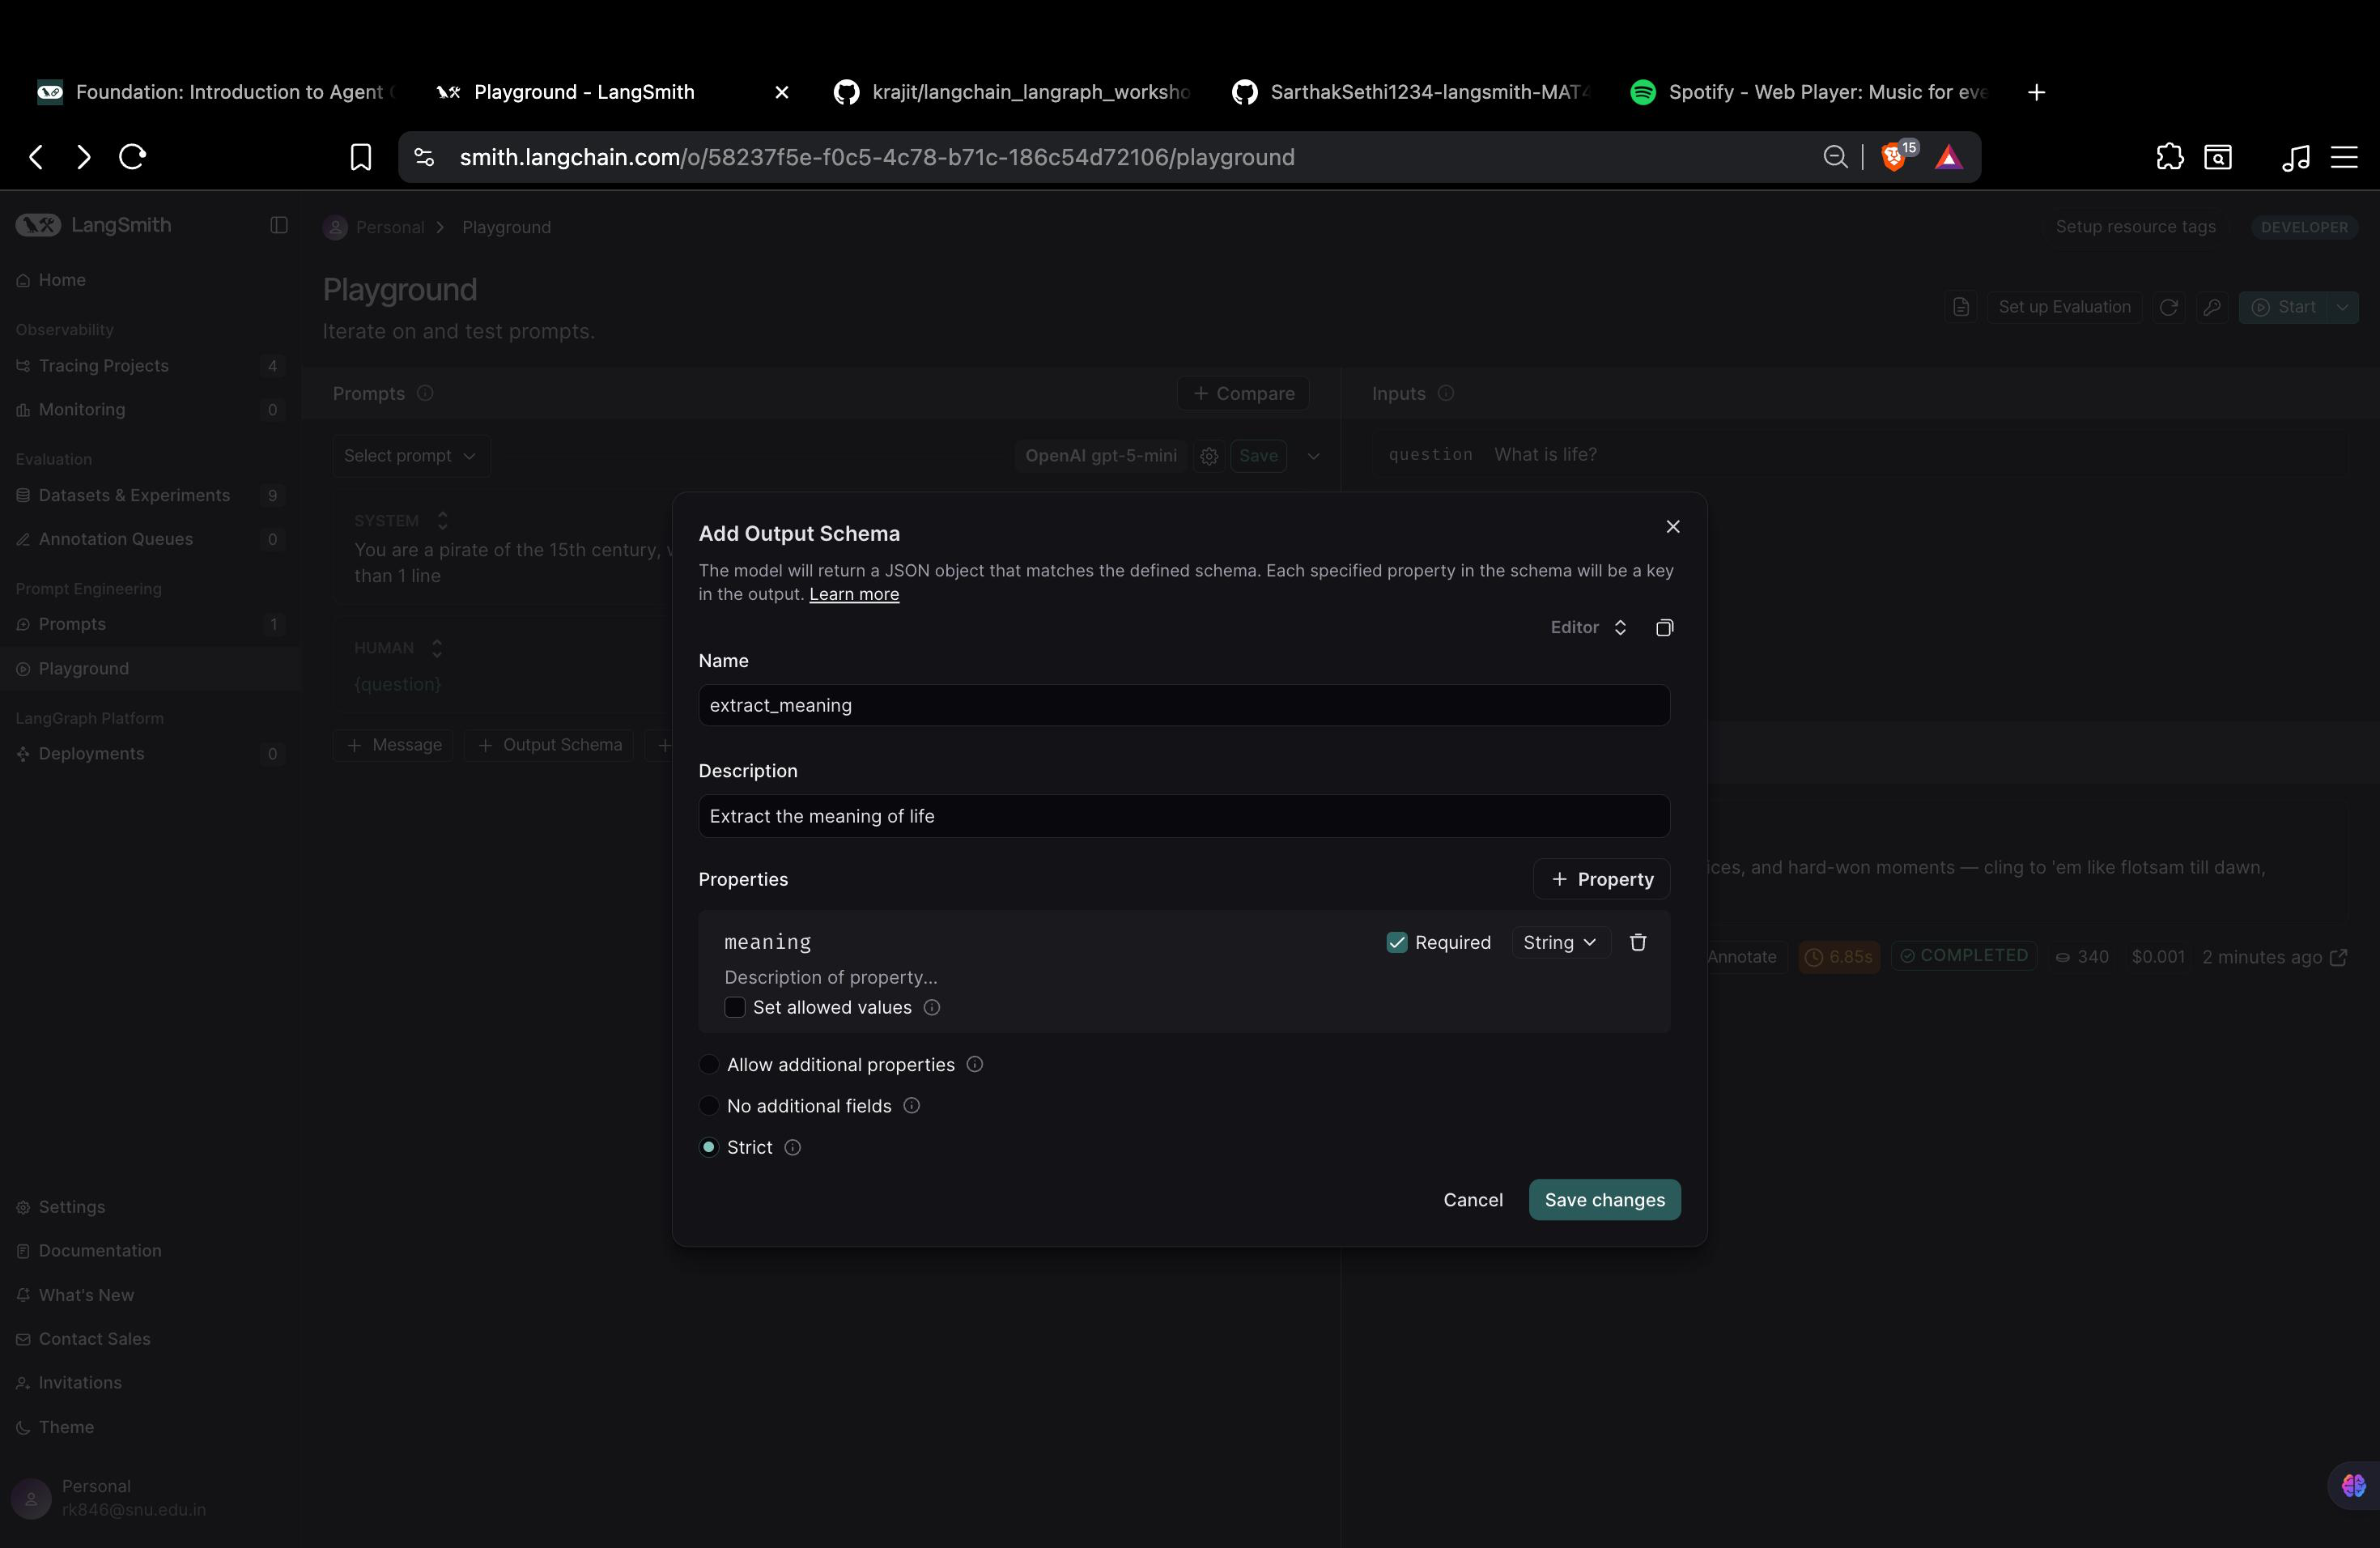

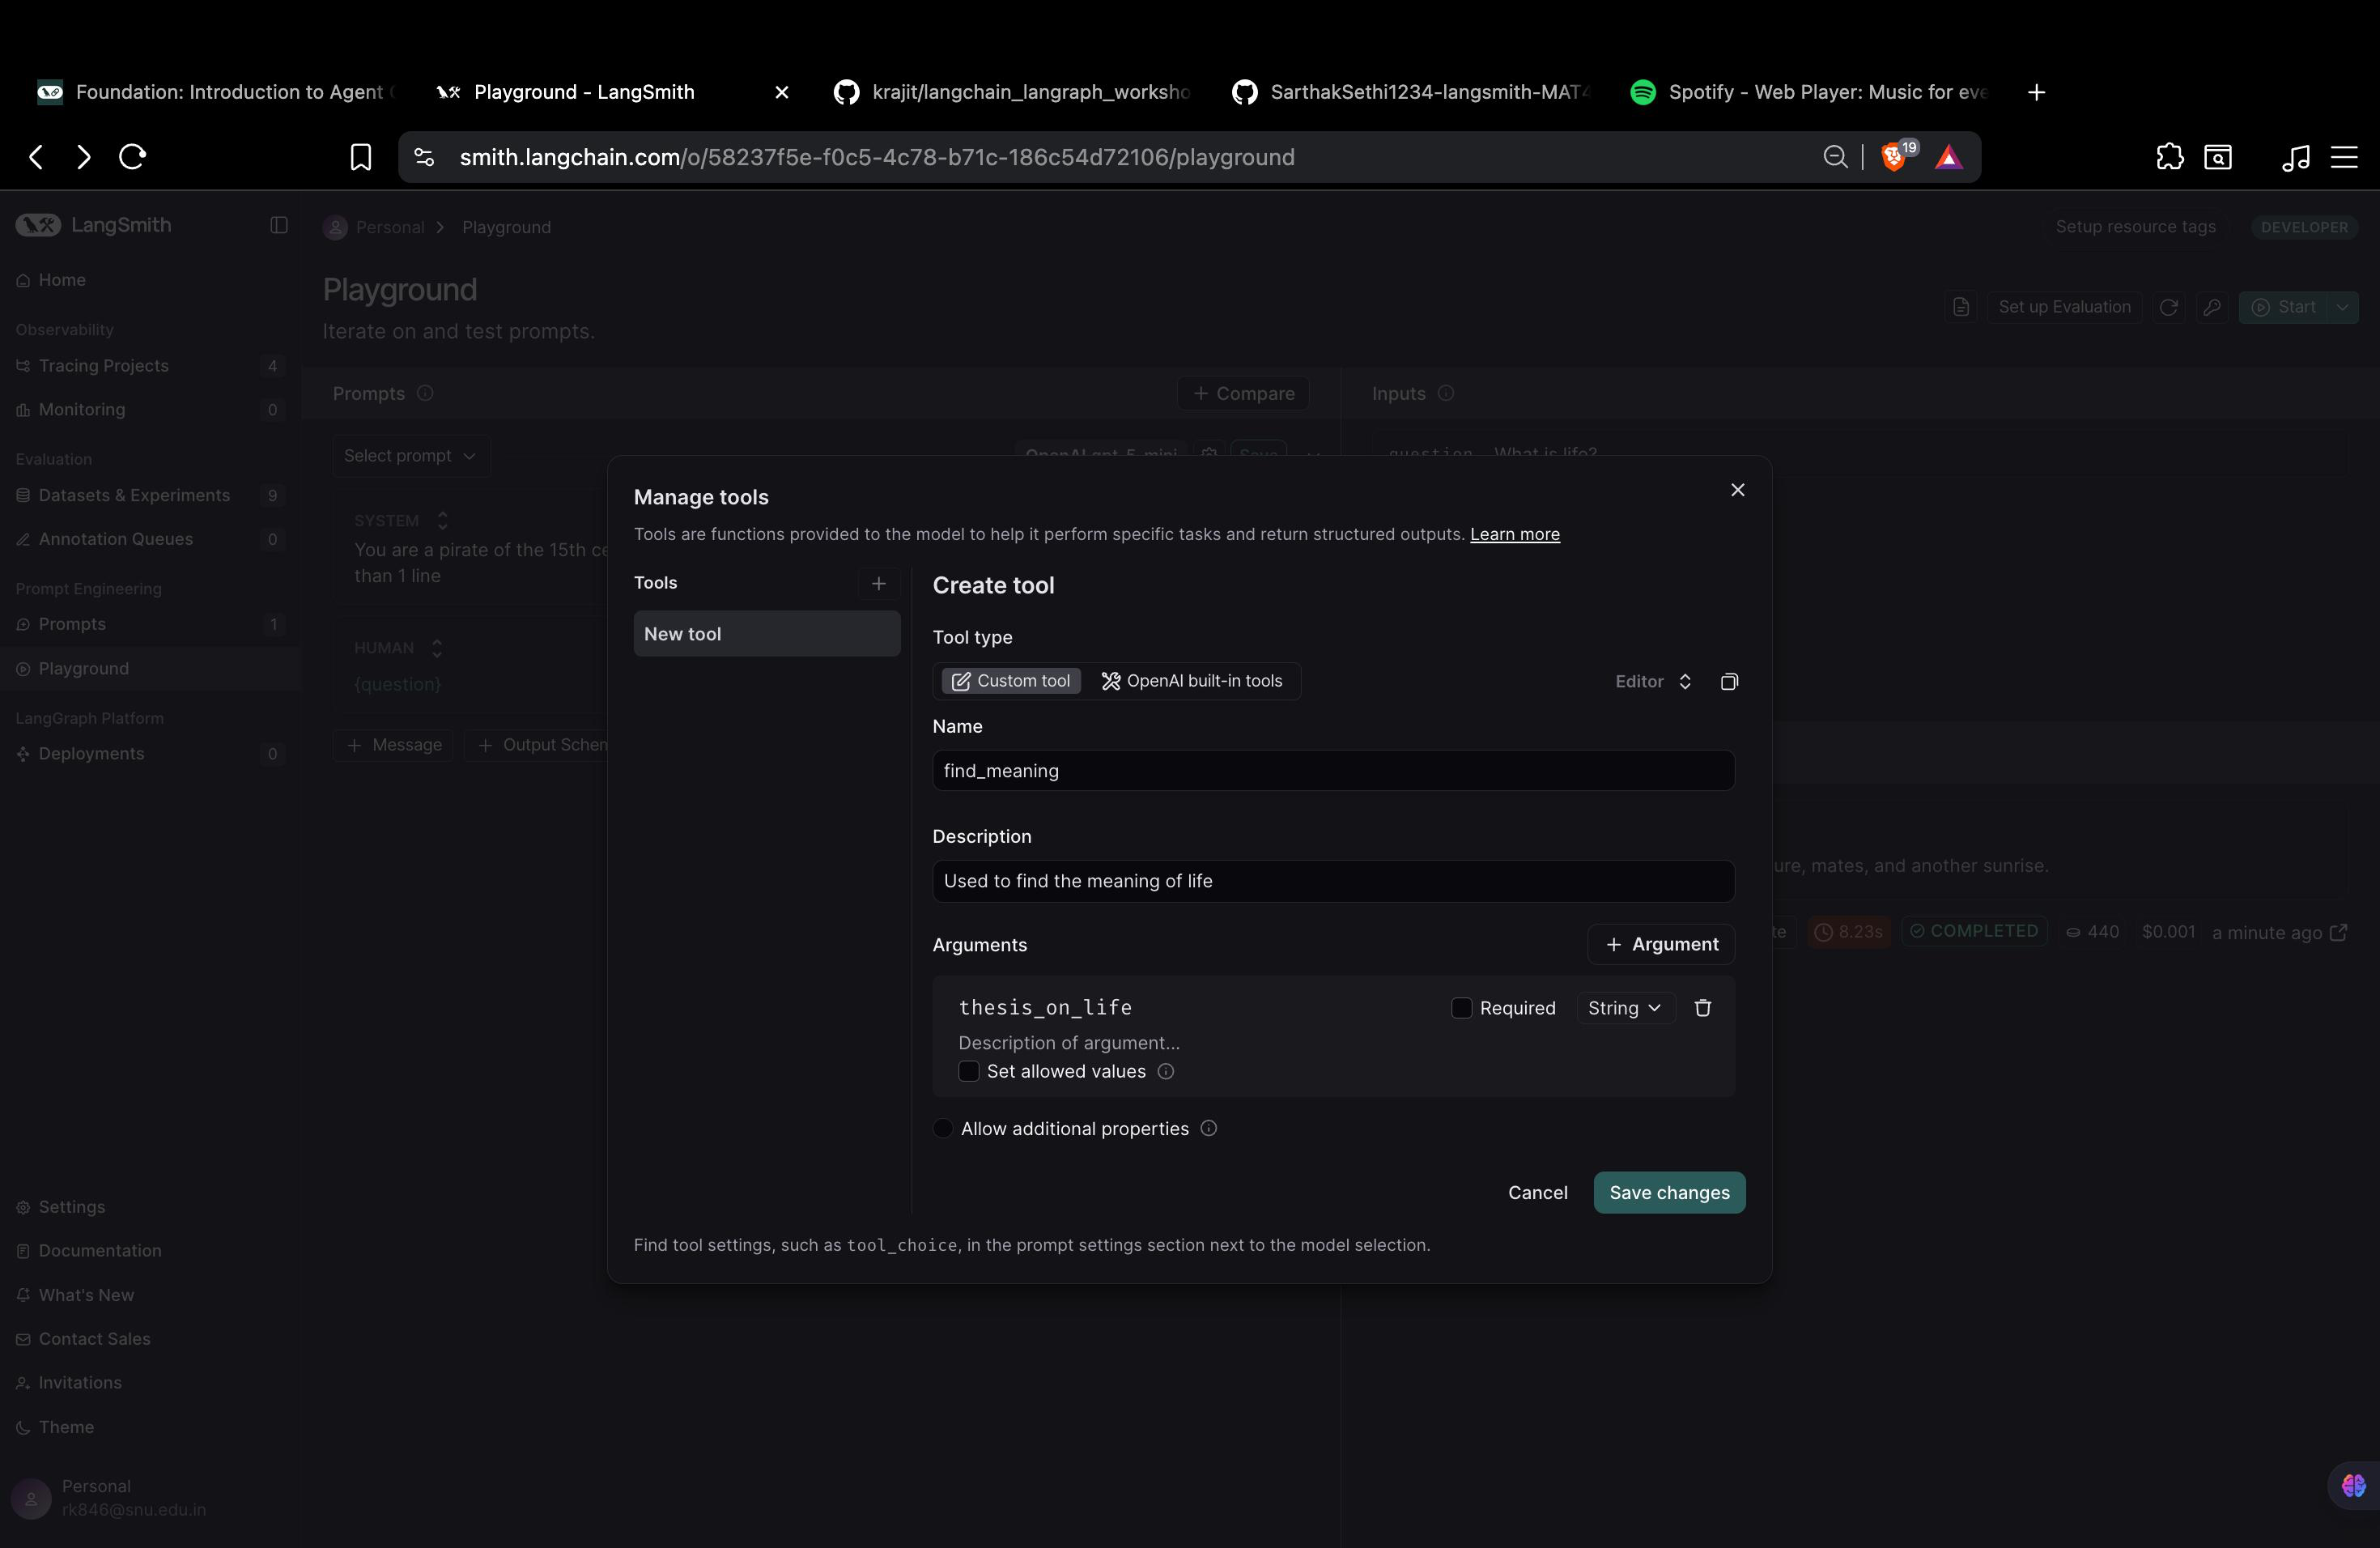

We can add tools, to see how the llm would behave if it had access to certain tools

### Create a Dataset

Let's create a toy example dataset to run experiments over for a prompt

In [3]:
from langsmith import Client

example_inputs = [
("What color is the sky?", "The sky is blue"),
("What color is grass?", "Grass is green"),
("What color is dirt?", "Dirt is brown"),
]

client = Client()
dataset_name = "Sample Questions"

dataset = client.create_dataset(
  dataset_name=dataset_name, description="Sample questions about color",
)

inputs = [{"question": input_prompt} for input_prompt, _ in example_inputs]
outputs = [{"output": output_answer} for _, output_answer in example_inputs]

client.create_examples(
  inputs=inputs,
  outputs=outputs,
  dataset_id=dataset.id,
)

{'example_ids': ['17401f0d-7251-4ab8-b5ce-fbe480863468',
  'fc5aaec3-c9bf-45f0-894e-1dd18da6e7d7',
  'c6e0cf57-292e-41eb-a106-f18eac78443c'],
 'count': 3}

### We can see this when we load our created database into playground
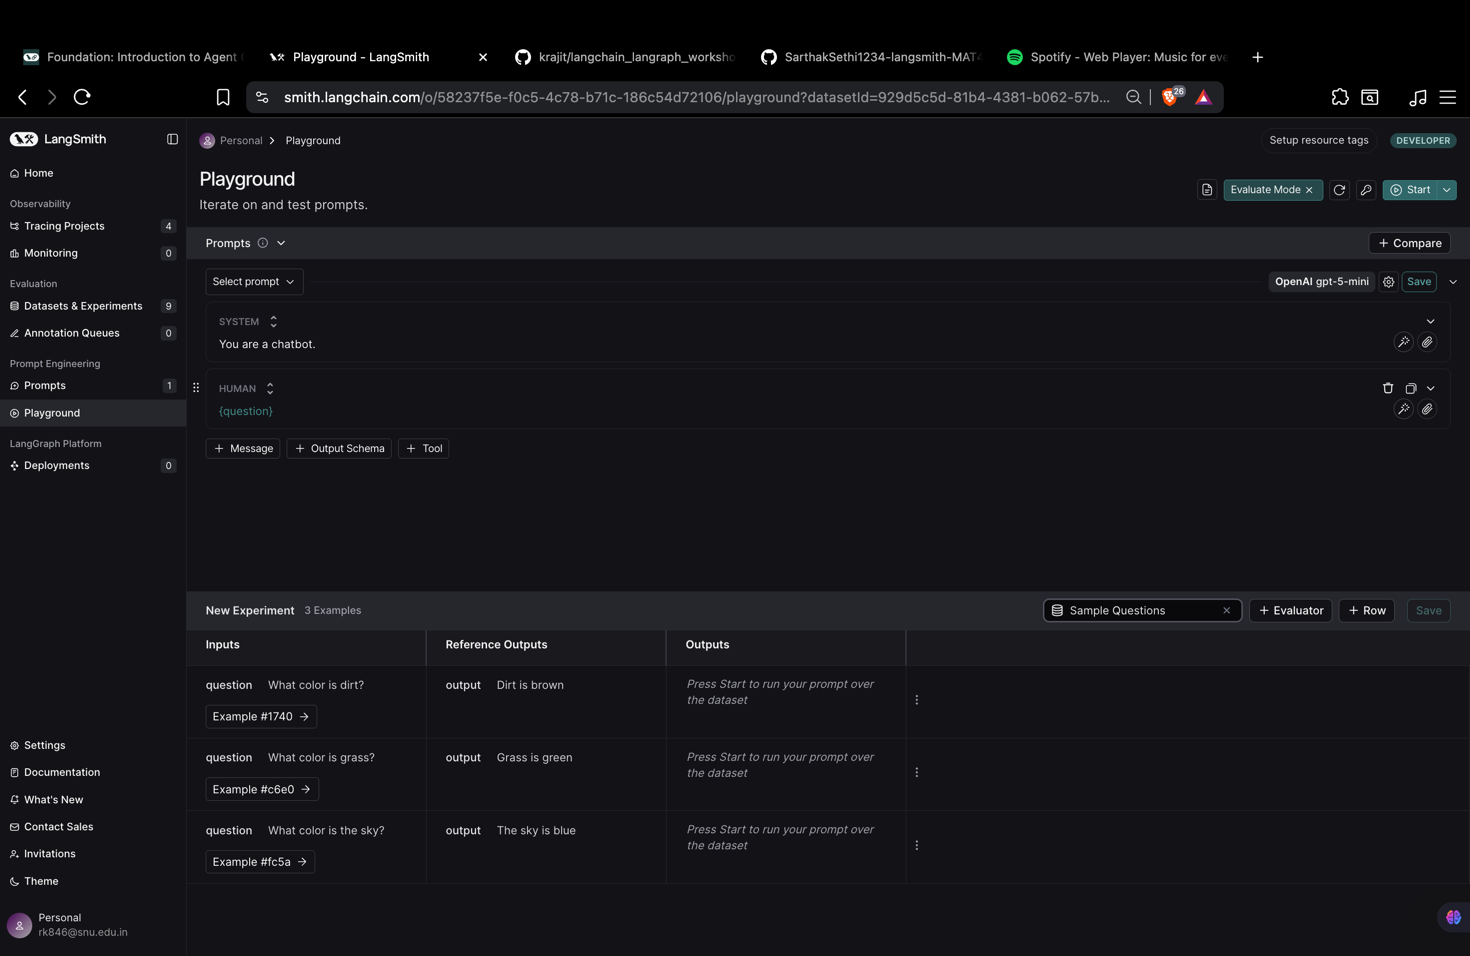

### run it to see the outputs, with the same prompt template

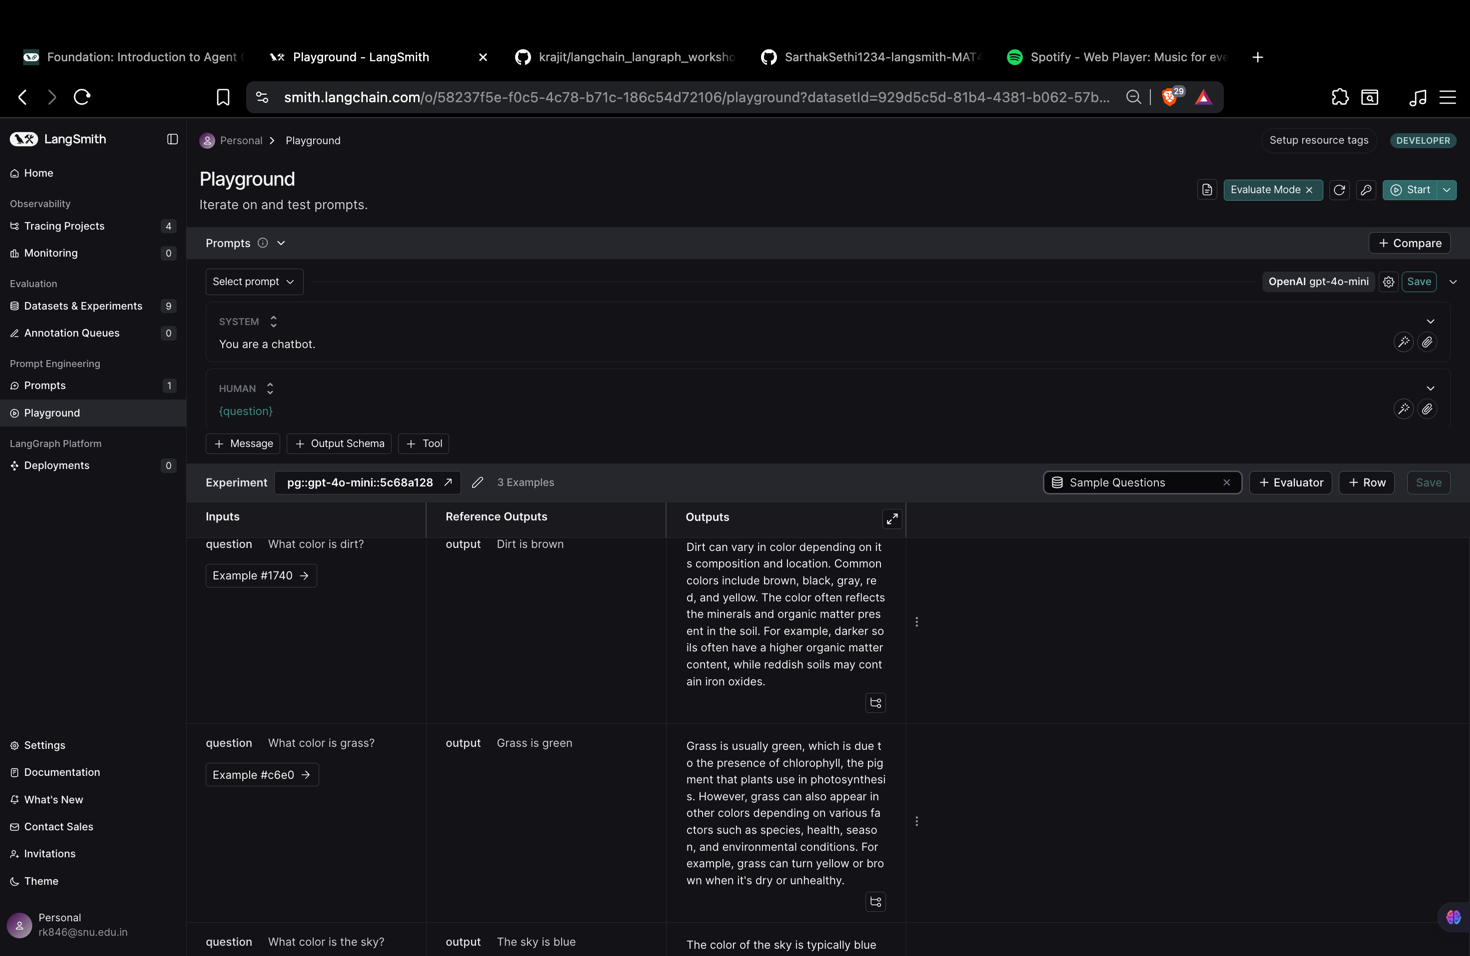

### modifying the prompt, in this case I asked it to give shorter results

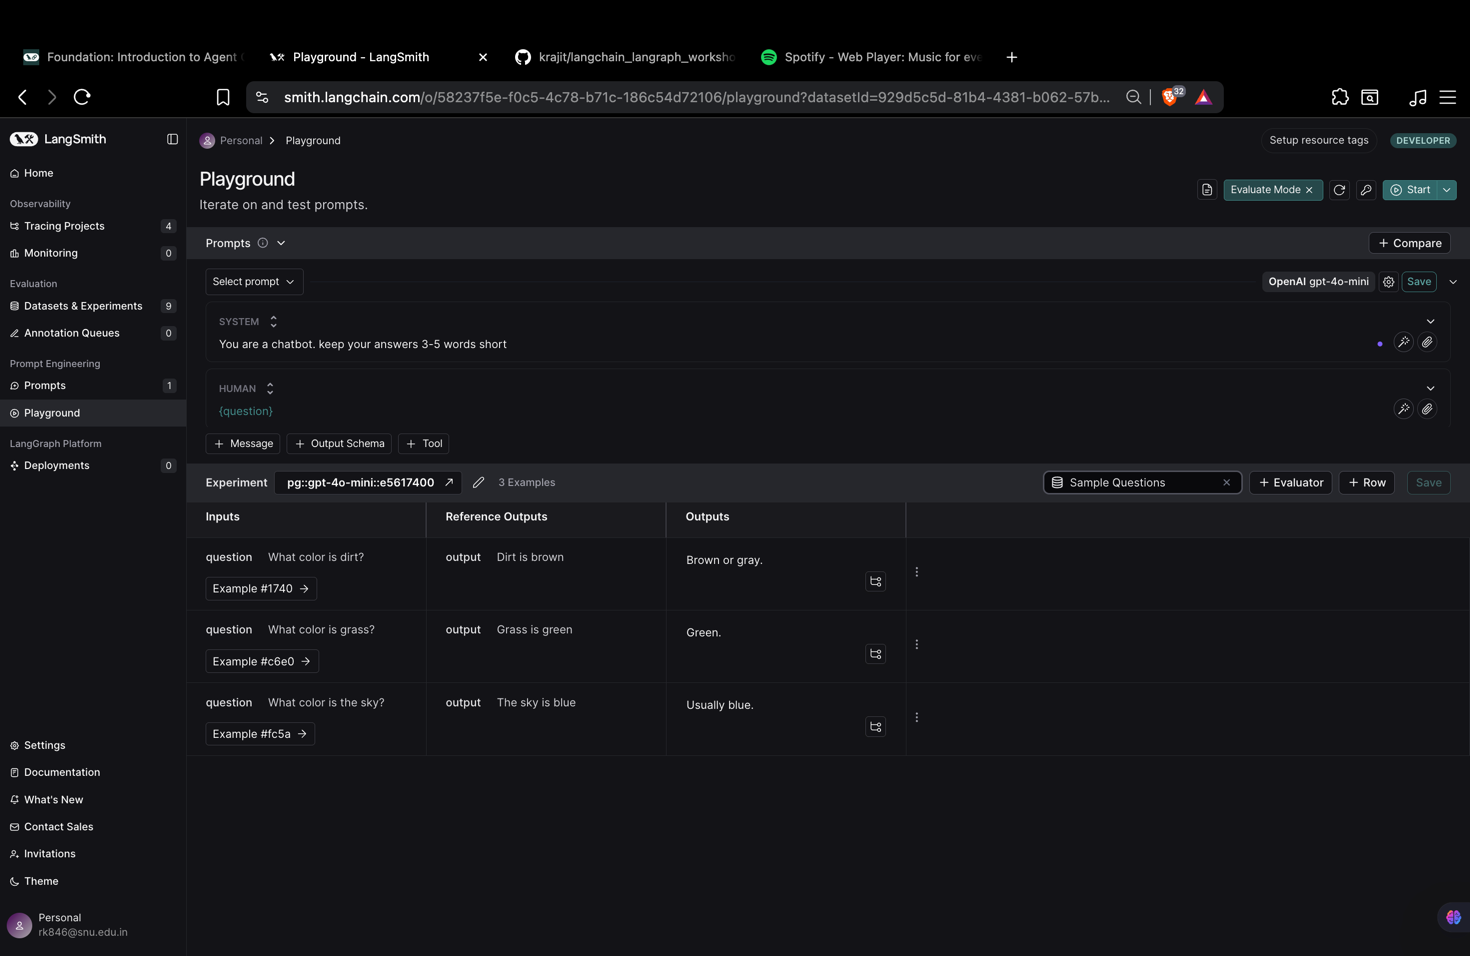
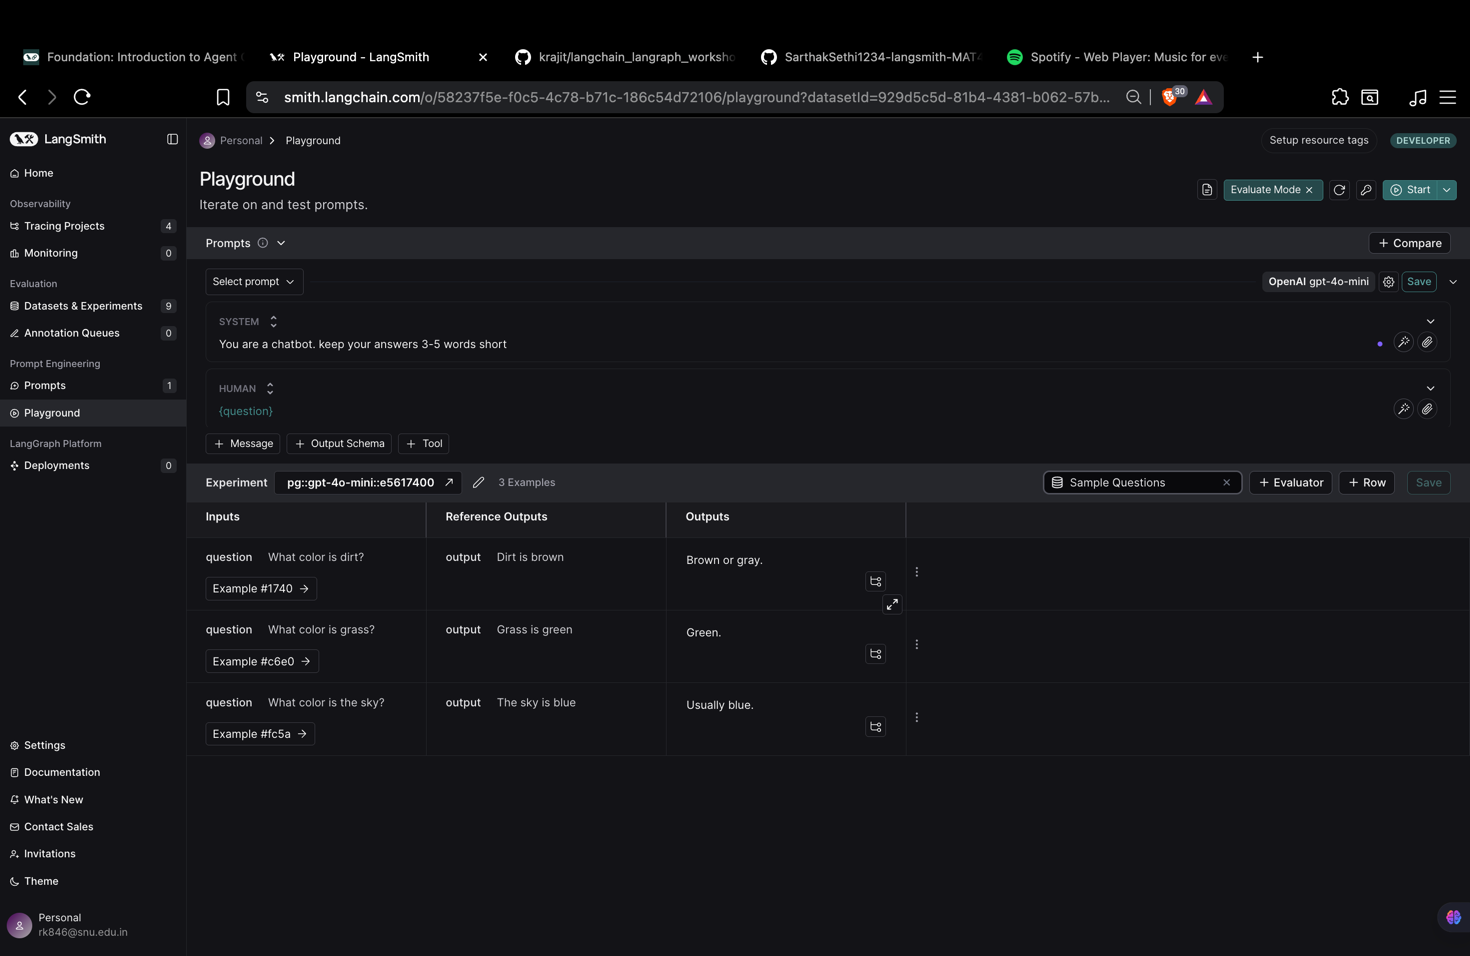
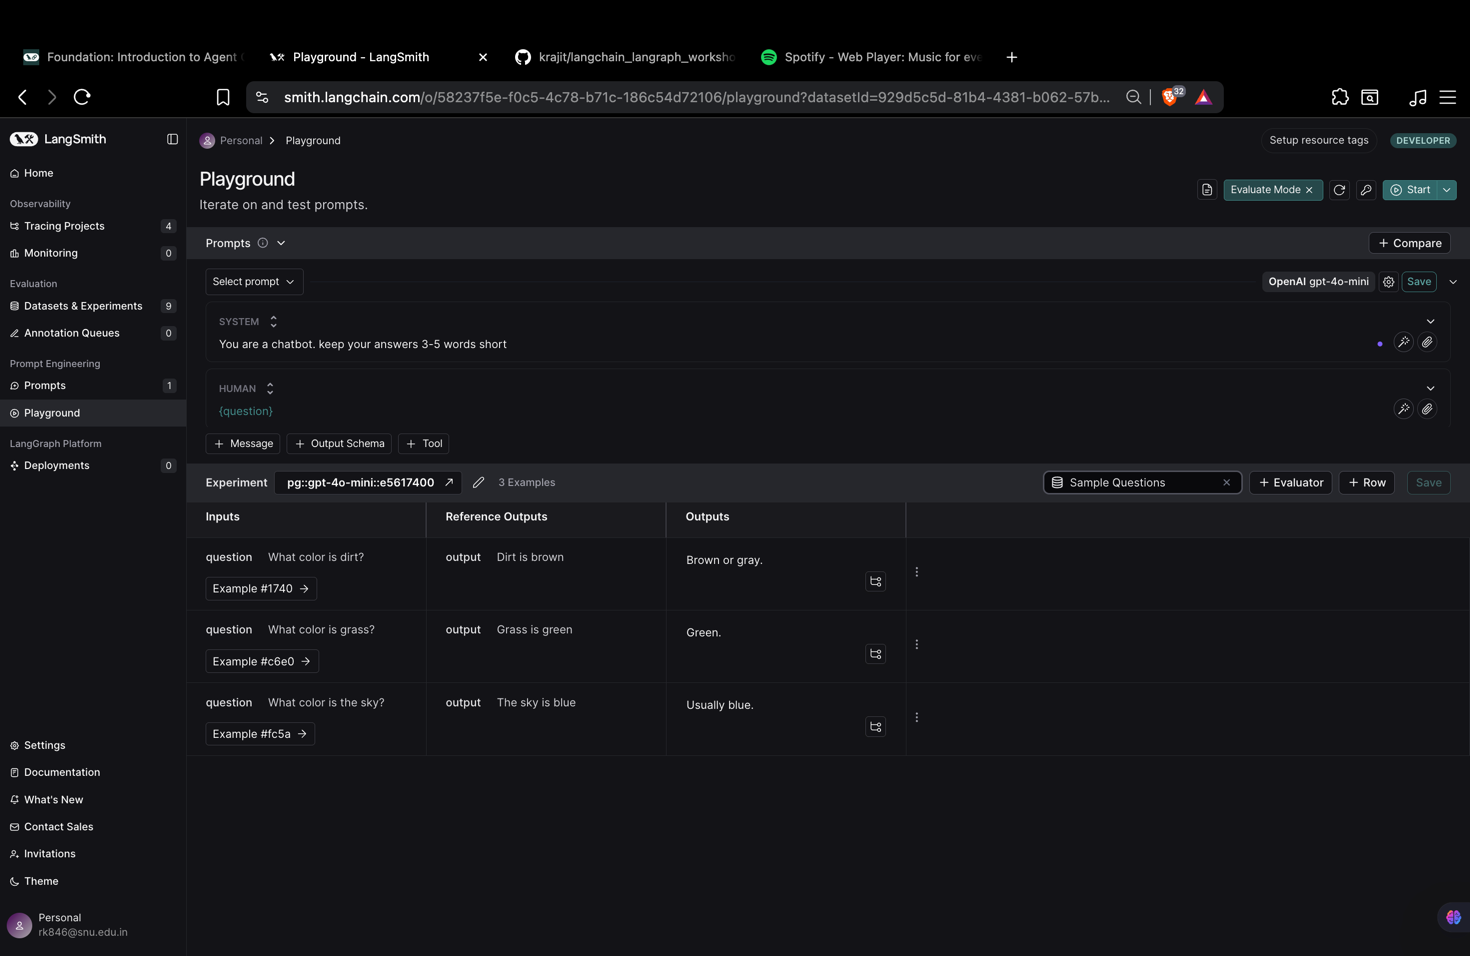

## MY OWN DATASET

In [4]:
from langsmith import Client

# Create a dataset about space and astronomy facts
example_inputs = [
    ("What is the largest planet in our solar system?", "Jupiter is the largest planet"),
    ("How many moons does Mars have?", "Mars has two moons"),
    ("What is the closest star to Earth?", "The Sun is the closest star to Earth"),
    ("What galaxy is Earth located in?", "Earth is in the Milky Way galaxy"),
    ("What is the hottest planet in the solar system?", "Venus is the hottest planet"),
    ("How long does it take light from the Sun to reach Earth?", "It takes about 8 minutes"),
    ("What is the smallest planet in our solar system?", "Mercury is the smallest planet"),
    ("How many planets are in our solar system?", "There are eight planets"),
    ("What is the name of Earth's natural satellite?", "The Moon is Earth's natural satellite"),
    ("What causes a solar eclipse?", "The Moon passes between the Sun and Earth"),
]

client = Client()
dataset_name = "Space Astronomy Questions"

dataset = client.create_dataset(
    dataset_name=dataset_name,
    description="Questions and answers about space, planets, and astronomy",
)

inputs = [{"question": input_prompt} for input_prompt, _ in example_inputs]
outputs = [{"output": output_answer} for _, output_answer in example_inputs]

client.create_examples(
    inputs=inputs,
    outputs=outputs,
    dataset_id=dataset.id,
)

print(f"Created dataset '{dataset_name}' with {len(example_inputs)} examples")
print(f"Dataset ID: {dataset.id}")


Created dataset 'Space Astronomy Questions' with 10 examples
Dataset ID: bbd971ce-fff4-4ef6-8907-4cce21585621


### loading my dataset into playground and giving the llm a custom prompt template

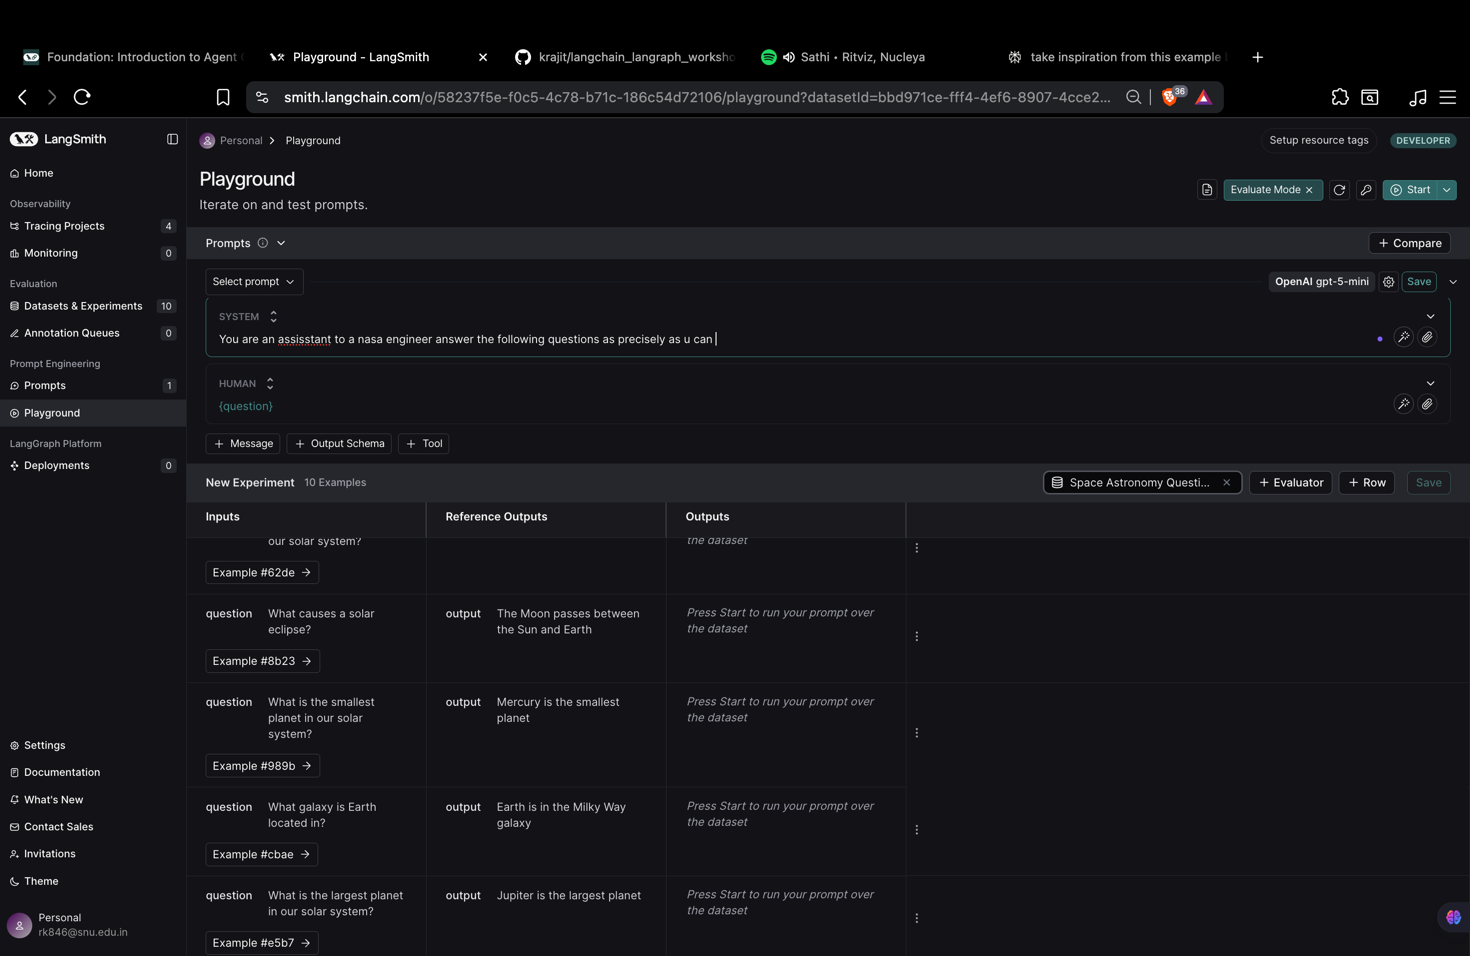

### We can see the outputs for all the prompts with the current prompt template along with the sample outputs which we set up


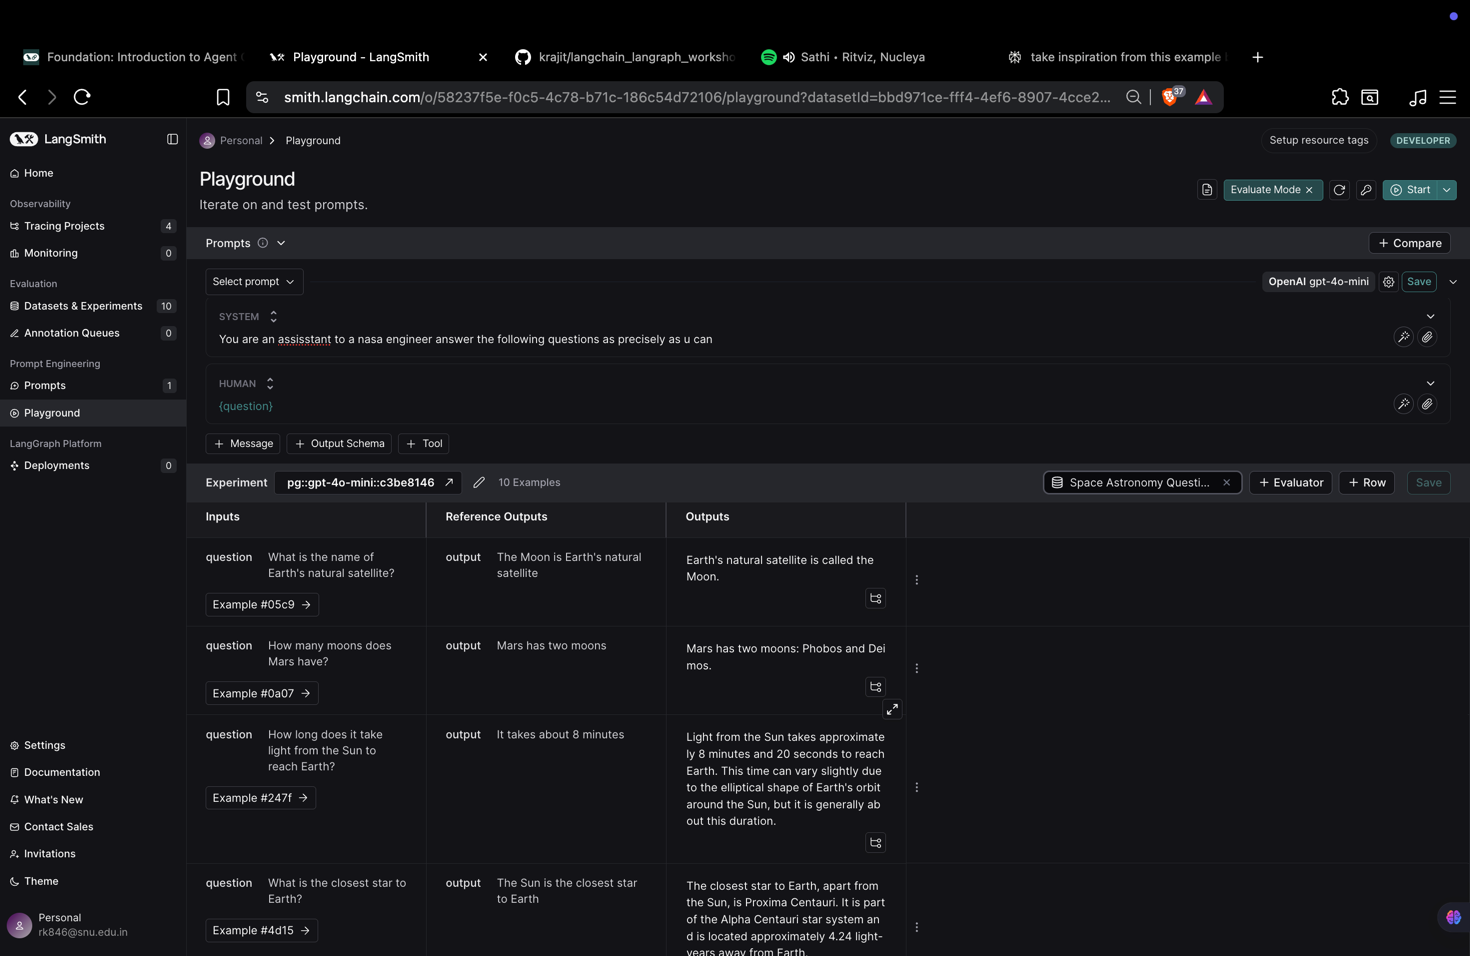




### modified the prompt template to give short answer

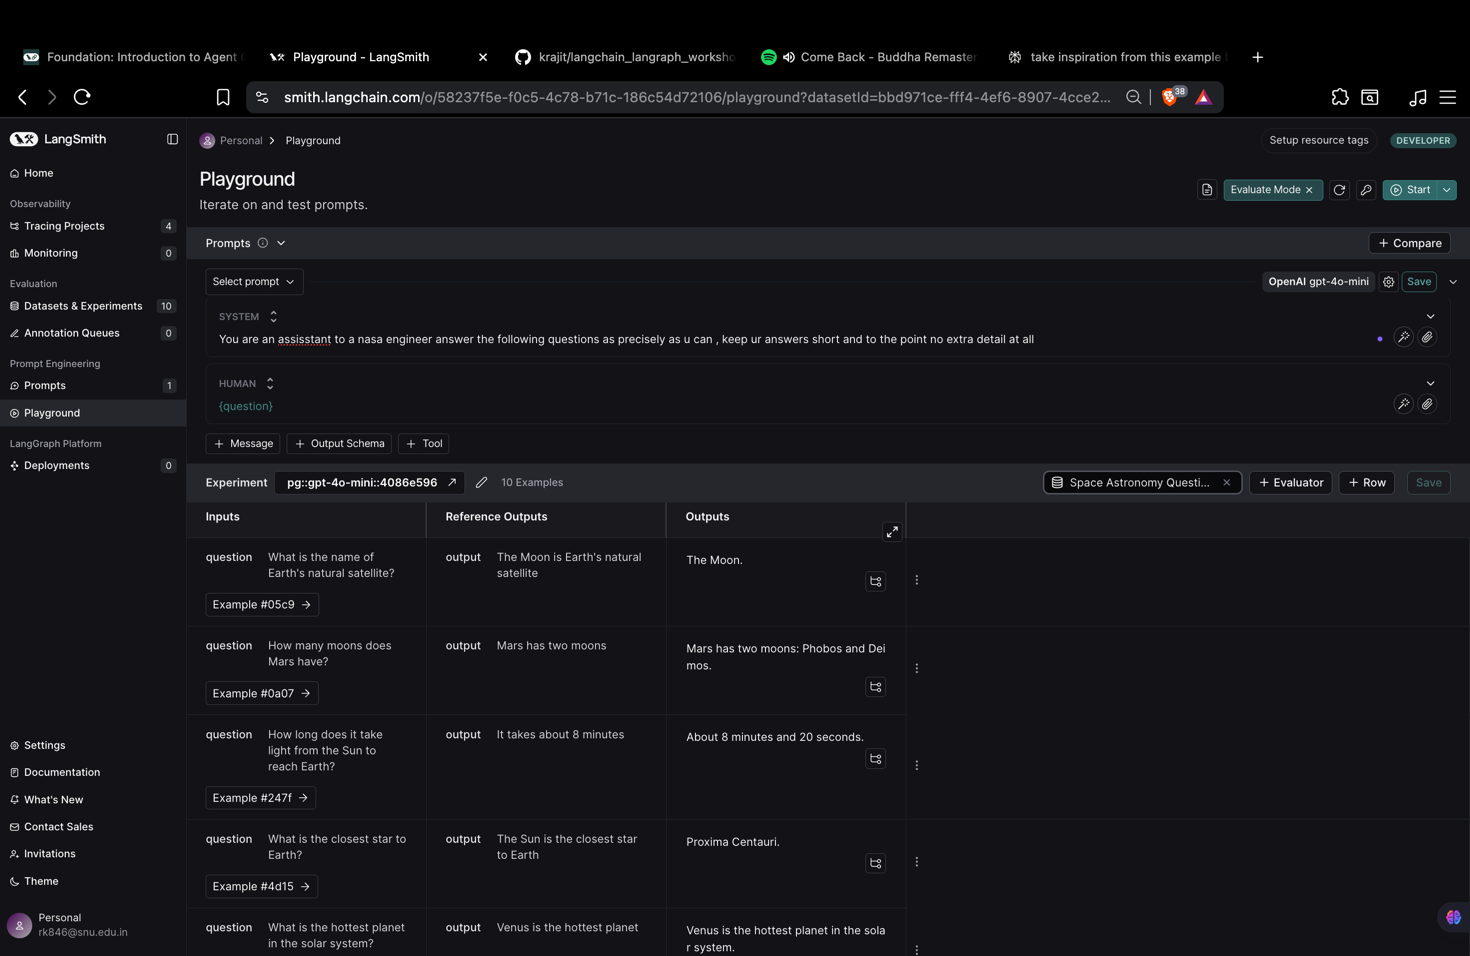



### Here I have set it up to compare the same prompt on the same dataset with two different llm models :


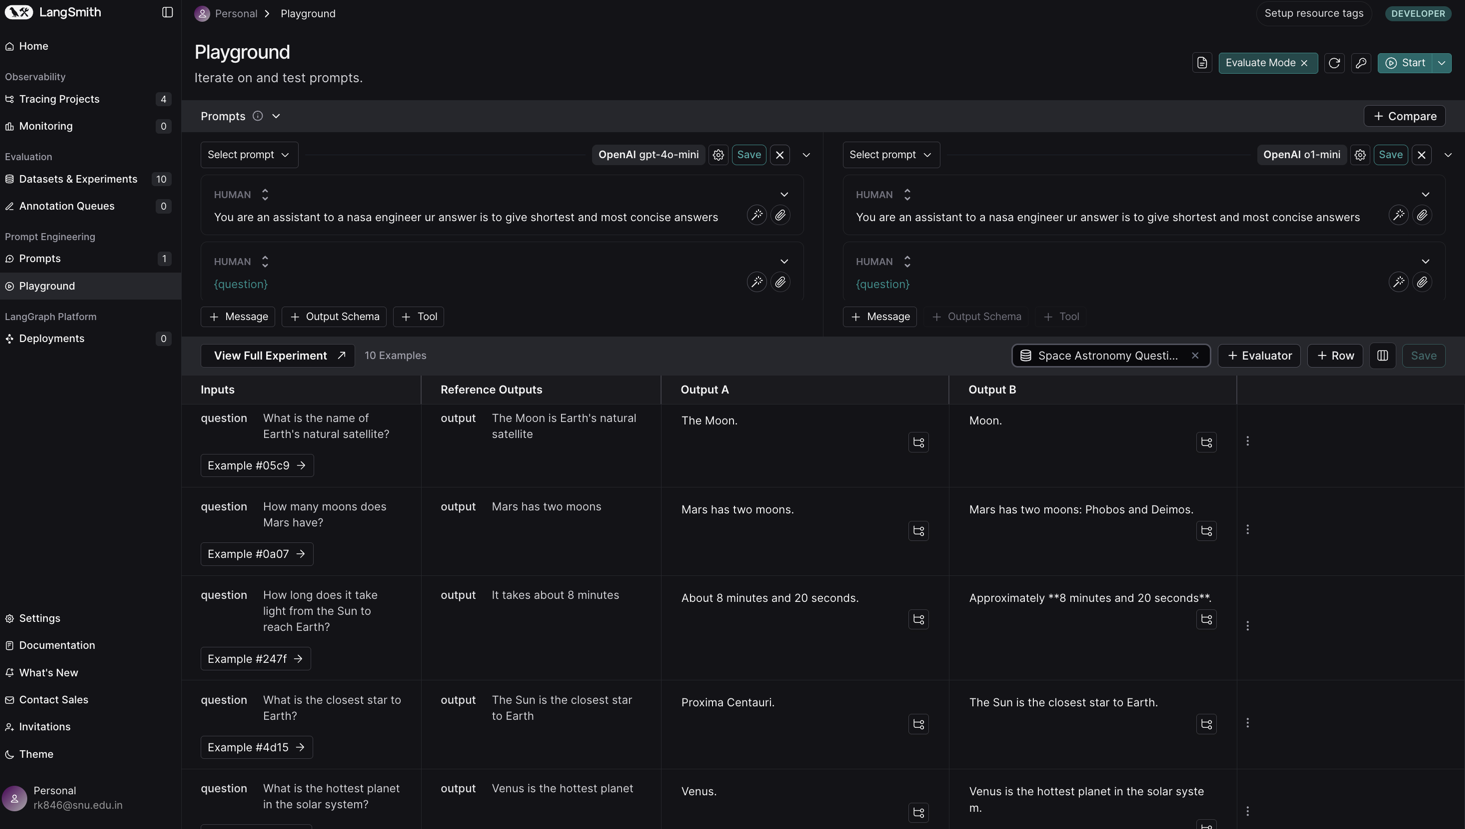

### We can add an evaluator here to individually assess the quality of responses from the llm for our database.

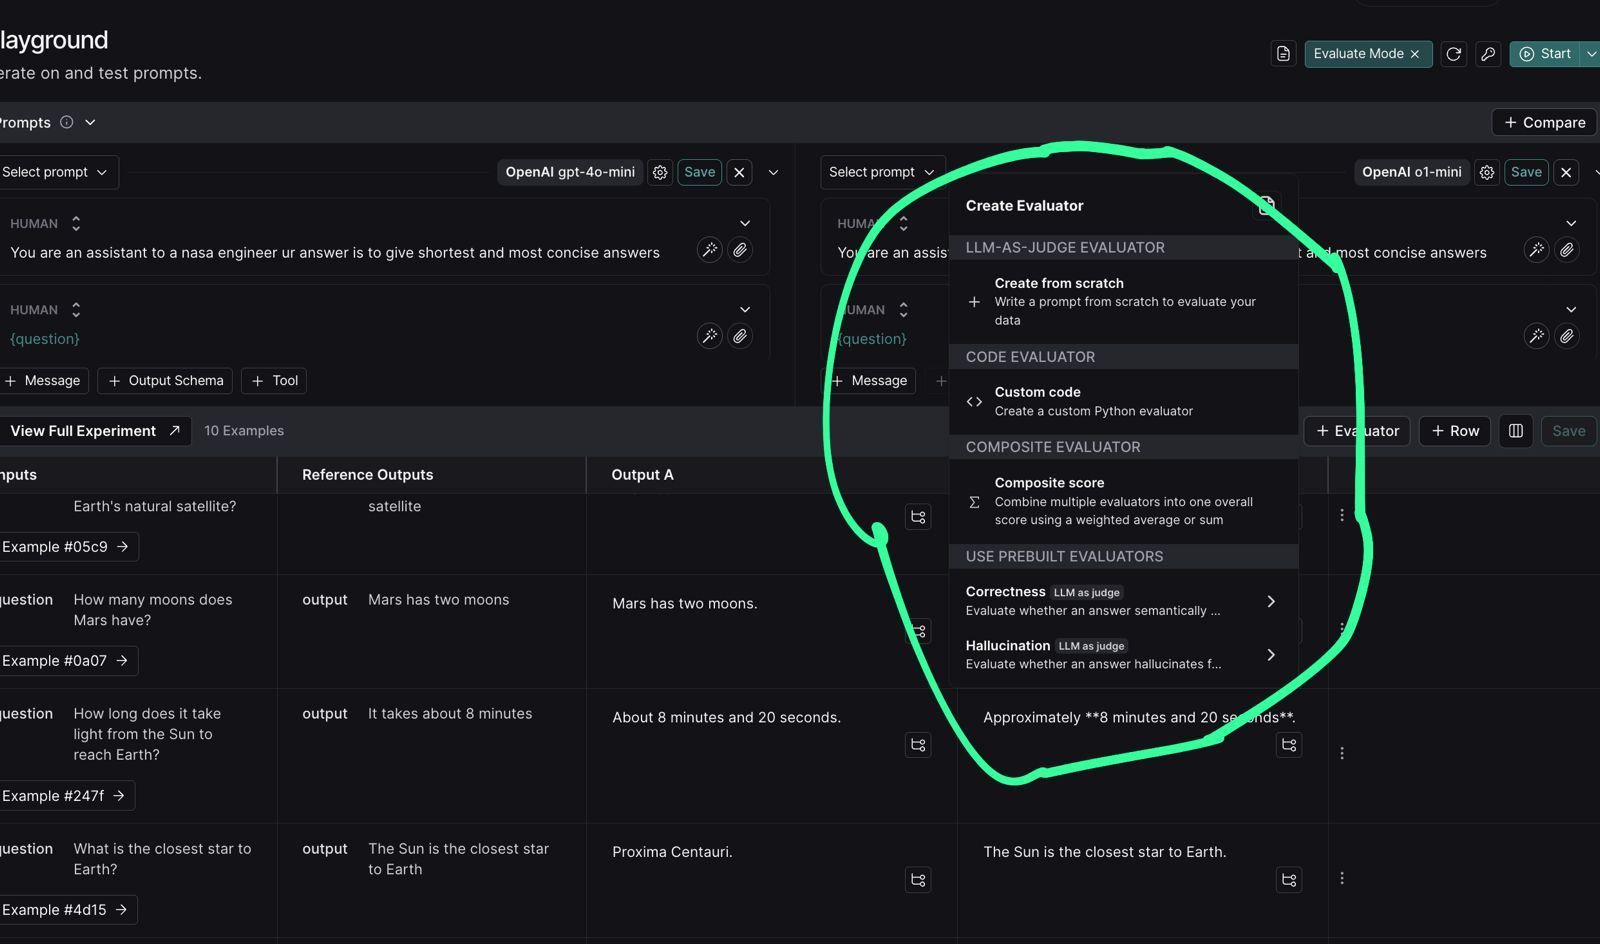